# Boston AirBnB Data # 

### Table of Contents ###
1. [Business  Understanding](#Business_Understanding)
2. [Data Understanding](#Data_Understanding)
3. [Data Preparation](#Data_Preparation)
4. [Modelling](#Modelling)
5. [Evaluation](#Evaluation)

### 1.[Business Understanding](#Business_understanding) ###

1. What are the most popular areas of Boston versus the least popular, and what are the monthly price trends of these areas
2. How does pricing fluctuate over the seasonal periods
2. How do the more violent areas of Boston trend with rental ability

### 2. [Data Understanding](#Data_Understanding) ###

This section will be used to understand the data we have in our files. 

In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from folium import plugins

#Import CSV files as dataframes
df_calendar = pd.read_csv("calendar.csv")
df_listings = pd.read_csv("listings.csv")
df_reviews = pd.read_csv("reviews.csv")
df_crime = pd.read_csv("crime.csv", encoding = "ISO-8859-1")

C:\Users\m046250\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### Calendar ###
Analysis into our calendar and the columns it contains

In [2]:
df_calendar.head(5)
#we can see that listing ID will be the primary key between the dataframes. 

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [3]:
#we can see 4 columns containing 1,308,890 entries
df_calendar.shape

(1308890, 4)

#### Listings ####

In [4]:
df_listings.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [5]:
df_listings.shape
#3585 entries with 95 columns

(3585, 95)

In [6]:
df_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

#### Reviews ####

In [7]:
df_reviews.head(3)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...


In [8]:
df_reviews.shape

#a nice simple dataframe with date, comment and listing_id

(68275, 6)

#### Crime ####

In [9]:
df_crime.head(3)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,495,NaN,2018-10-03 20:13:00,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.262608,-71.121186,"(42.26260773, -71.12118637)"
1,I182080053,3201,Property Lost,PROPERTY - LOST,D14,795,NaN,2018-08-30 20:00:00,2018,8,Thursday,20,Part Three,ALLSTON ST,42.352111,-71.135311,"(42.35211146, -71.13531147)"
2,I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,329,NaN,2018-10-03 19:20:00,2018,10,Wednesday,19,Part Two,DEVON ST,42.308126,-71.076930,"(42.30812619, -71.07692974)"


In [10]:
print(df_crime.shape)
df_crime.columns

(327820, 17)


Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

### 3. [Data Preparation](#Data_Preparation) ###
 This section will be used to prepare the data for further analysis.

In [87]:
listings_null = (df_listings.isnull().sum()/len(df_listings))*100
listings_null.value_counts()
nulls = listings_null[listings_null == 100]
nulls = nulls.index

print(nulls)
#drop the empty columns
df_listings = df_listings.drop(nulls, axis=1)

Index(['neighbourhood_group_cleansed', 'has_availability', 'license',
       'jurisdiction_names'],
      dtype='object')


In [100]:
print(((df_listings.isnull().sum()/len(df_listings))*100).value_counts())
#we can see all columns with 100# missing values are gone


0.000000     51
21.087866     3
13.138075     3
16.708508     3
0.390516      2
22.817294     2
35.983264     1
0.055788      1
75.118550     1
0.251046      1
0.278940      1
22.928870     1
33.249651     1
43.347280     1
55.090656     1
3.988842      1
36.513250     1
1.059972      1
75.230126     1
29.483961     1
62.566248     1
98.437936     1
15.146444     1
22.900976     1
22.956764     1
0.083682      1
41.534170     1
39.470014     1
22.873082     1
30.878661     1
0.306834      1
9.456067      1
22.677824     1
dtype: int64

In [172]:
#new dataframe for review scoring and an average overall score /10
scores = df_listings[[u'id', u'neighbourhood', u'review_scores_accuracy',u'review_scores_cleanliness',
       u'review_scores_checkin', u'review_scores_communication',
       u'review_scores_location', u'review_scores_value', u'review_scores_rating']]

scores['total_review'] = (scores['review_scores_cleanliness'] + scores['review_scores_checkin'] 
            + scores['review_scores_communication'] + scores['review_scores_location'] + 
            scores['review_scores_value'] + scores['review_scores_accuracy'])/6
scores.head(10)

C:\Users\m046250\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,id,neighbourhood,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,review_scores_rating,total_review
0,12147973,Roslindale,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3075044,Roslindale,10.0,9.0,10.0,10.0,9.0,9.0,94.0,9.500000
2,6976,Roslindale,10.0,9.0,10.0,10.0,9.0,10.0,98.0,9.666667
3,1436513,NaN,10.0,10.0,10.0,10.0,10.0,10.0,100.0,10.000000
4,7651065,Roslindale,10.0,10.0,10.0,10.0,9.0,10.0,99.0,9.833333
5,12386020,Roslindale,10.0,10.0,10.0,10.0,9.0,10.0,100.0,9.833333
6,5706985,NaN,10.0,10.0,10.0,10.0,9.0,9.0,90.0,9.666667
7,2843445,Roslindale,10.0,10.0,10.0,10.0,10.0,10.0,96.0,10.000000
8,753446,Roslindale,10.0,10.0,10.0,10.0,9.0,10.0,96.0,9.833333
9,849408,Roslindale,10.0,9.0,10.0,10.0,9.0,9.0,94.0,9.500000


In [216]:
scores = scores.dropna()
# as we have no catergorical variables in our list, we can simply perform a Drop all NaN's on our dataset.
# no data therefore needs to be re-encoded for our listings

In [197]:
#creating a dataframe for average mean scores of total reviews
avg_score = scores.groupby('neighbourhood')['total_review'].mean()
avg_score

neighbourhood
Allston-Brighton       9.286967
Back Bay               9.468037
Beacon Hill            9.605664
Brookline              9.833333
Cambridge              7.666667
Charlestown            9.628415
Chestnut Hill          9.000000
Chinatown              9.322222
Dorchester             9.211577
Downtown               8.880952
Downtown Crossing      9.507937
East Boston            9.268868
Fenway/Kenmore         9.212215
Financial District    10.000000
Government Center      9.444444
Hyde Park              9.472222
Jamaica Plain          9.621723
Leather District       9.666667
Mattapan               8.861111
Mission Hill           9.027363
North End              9.616822
Roslindale             9.692029
Roxbury                9.191228
Somerville             9.285714
South Boston           9.610487
South End              9.564103
Theater District       9.219697
West End               9.283784
West Roxbury           9.753086
Name: total_review, dtype: float64

In [198]:
df_cal = df_calendar.copy()
df_cal = df_cal.rename(columns={'listing_id':'id'})
df_cal1=df_cal
#print(df_cal.price.isnull().sum()) # we can see half the results don't have a price. 
#We will drop these, no price means it is not available
#df_cal = df_cal.dropna()
df_cal.head(5)
#we need to drop the $ sign. 

,id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [199]:
#converting to a string and removing the '$'
print(df_cal.price.dtype)
df_cal.price.astype(str)
df_cal['price'] = df_cal['price'].str.replace('$','')
df_cal['price'] = df_cal['price'].str.replace(',','')
df_cal['price'] = df_cal['price'].astype(float)
df_cal.head(3)

object


,id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN


In [201]:
score_cal = scores.merge(df_cal, on='id', how='left')
score_cal

,id,neighbourhood,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,review_scores_rating,total_review,date,available,price
0,3075044,Roslindale,10.0,9.0,10.0,10.0,9.0,9.0,94.0,9.500000,2017-08-22,t,65.0
1,3075044,Roslindale,10.0,9.0,10.0,10.0,9.0,9.0,94.0,9.500000,2017-08-21,t,65.0
2,3075044,Roslindale,10.0,9.0,10.0,10.0,9.0,9.0,94.0,9.500000,2017-08-20,t,65.0
3,3075044,Roslindale,10.0,9.0,10.0,10.0,9.0,9.0,94.0,9.500000,2017-08-19,t,75.0
4,3075044,Roslindale,10.0,9.0,10.0,10.0,9.0,9.0,94.0,9.500000,2017-08-18,t,75.0
5,3075044,Roslindale,10.0,9.0,10.0,10.0,9.0,9.0,94.0,9.500000,2017-08-17,t,65.0
6,3075044,Roslindale,10.0,9.0,10.0,10.0,9.0,9.0,94.0,9.500000,2017-08-16,t,65.0
7,3075044,Roslindale,10.0,9.0,10.0,10.0,9.0,9.0,94.0,9.500000,2017-08-15,t,65.0
8,3075044,Roslindale,10.0,9.0,10.0,10.0,9.0,9.0,94.0,9.500000,2017-08-14,t,65.0
9,3075044,Roslindale,10.0,9.0,10.0,10.0,9.0,9.0,94.0,9.500000,2017-08-13,t,65.0


In [202]:
score_cal['month'] = (pd.to_datetime(score_cal['date']).dt.month)

In [203]:
score_cal.groupby('neighbourhood').count()

,id,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,review_scores_rating,total_review,date,available,price,month
neighbourhood,,,,,,,,,,,,,
Allston-Brighton,97090,97090,97090,97090,97090,97090,97090,97090,97090,97090,97090,40410,97090
Back Bay,79935,79935,79935,79935,79935,79935,79935,79935,79935,79935,79935,44592,79935
Beacon Hill,55845,55845,55845,55845,55845,55845,55845,55845,55845,55845,55845,25843,55845
Brookline,730,730,730,730,730,730,730,730,730,730,730,226,730
Cambridge,730,730,730,730,730,730,730,730,730,730,730,662,730
Charlestown,22265,22265,22265,22265,22265,22265,22265,22265,22265,22265,22265,11387,22265
Chestnut Hill,730,730,730,730,730,730,730,730,730,730,730,727,730
Chinatown,16425,16425,16425,16425,16425,16425,16425,16425,16425,16425,16425,7666,16425
Dorchester,60955,60955,60955,60955,60955,60955,60955,60955,60955,60955,60955,38430,60955


In [204]:
#financial District by Monthly Average for price
financial_district = score_cal[score_cal['neighbourhood'] == 'Financial District']
fin_cal = financial_district.groupby('month').mean()
x = fin_cal.price
x

month
1     296.064516
2     234.244898
3     306.548387
4     381.346154
5     490.161290
6     616.866667
7     668.935484
8     860.709677
9     599.928571
10    396.233333
11    302.500000
12    224.673913
Name: price, dtype: float64

In [205]:
#Cambridge by Monthly Average for price
cam_district = score_cal[score_cal['neighbourhood'] == 'Cambridge']
cam_cal = cam_district.groupby('month').mean()
c = cam_cal.price
c

month
1     209.500000
2     209.500000
3     231.612903
4     253.066667
5     231.000000
6     234.600000
7     233.677419
8     235.903226
9     266.923077
10    279.708333
11    208.392157
12    224.500000
Name: price, dtype: float64

In [206]:
#find the total average cost of rent by month for all Airbnb's in Boston.
avg_all = score_cal.groupby('month').mean()
avg_all = avg_all.price
avg_all

month
1     179.998978
2     178.963738
3     181.736716
4     200.382080
5     195.744040
6     200.174634
7     208.228704
8     210.504803
9     228.078986
10    224.584228
11    195.307294
12    187.546877
Name: price, dtype: float64

Adding a new column per Suburb based on district code[2].

In [207]:
df_crime['DISTRICT'].value_counts()

B2     51288
C11    43817
D4     43338
A1     36735
B3     36400
C6     24190
D14    20632
E13    17981
E18    17825
A7     13634
E5     13543
A15     6663
Name: DISTRICT, dtype: int64

In [208]:
crime_sub = df_crime.copy()
crime_sub['Neighbourhood'] = crime_sub['DISTRICT']

In [209]:
crime_sub['Neighbourhood'] = crime_sub['Neighbourhood'].replace({'B2':'Roxbury','C11':'Dorchester',
                                                                      'D4':'South End','A1':'Downtown',
                                                                      'B3':'Mattapan','C6':'South Boston',
                                                                      'D14':'Brighton','E13':'Jamaica Plain',
                                                                      'E18':'Hyde Park','A7':'East Boston',
                                                                      'E5':'West Roxbury','A15':'Charlestown'})
crime_sub.head(5)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,Neighbourhood
0,I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,495,NaN,2018-10-03 20:13:00,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.262608,-71.121186,"(42.26260773, -71.12118637)",Hyde Park
1,I182080053,3201,Property Lost,PROPERTY - LOST,D14,795,NaN,2018-08-30 20:00:00,2018,8,Thursday,20,Part Three,ALLSTON ST,42.352111,-71.135311,"(42.35211146, -71.13531147)",Brighton
2,I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,329,NaN,2018-10-03 19:20:00,2018,10,Wednesday,19,Part Two,DEVON ST,42.308126,-71.076930,"(42.30812619, -71.07692974)",Roxbury
3,I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,92,NaN,2018-10-03 20:00:00,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.359454,-71.059648,"(42.35945371, -71.05964817)",Downtown
4,I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,A7,36,NaN,2018-10-03 20:49:00,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.375258,-71.024663,"(42.37525782, -71.02466343)",East Boston


In [210]:
crime_sub.groupby('Neighbourhood')['OFFENSE_CODE'].count()

Neighbourhood
Brighton         20632
Charlestown       6663
Dorchester       43817
Downtown         36735
East Boston      13634
Hyde Park        17825
Jamaica Plain    17981
Mattapan         36400
Roxbury          51288
South Boston     24190
South End        43338
West Roxbury     13543
Name: OFFENSE_CODE, dtype: int64

In [211]:
#crime_sub2 = crime_sub.copy()
crime_sub = crime_sub.drop(crime_sub[crime_sub.YEAR == 2018].index)
crime_sub = crime_sub.drop(crime_sub[crime_sub.YEAR == 2015].index)
crime_sub

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,Neighbourhood
25,I182080026,2629,Harassment,HARASSMENT,C6,256,NaN,2017-08-31 00:00:00,2017,8,Thursday,0,Part Two,MOUNT VERNON ST,42.317794,-71.042110,"(42.31779354, -71.04210959)",South Boston
89,I182079957,2629,Harassment,HARASSMENT,A1,110,NaN,2017-05-01 09:00:00,2017,5,Monday,9,Part Two,OLIVER ST,42.355633,-71.052646,"(42.35563262, -71.05264582)",Downtown
90,I182079957,2647,Other,THREATS TO DO BODILY HARM,A1,110,NaN,2017-05-01 09:00:00,2017,5,Monday,9,Part Two,OLIVER ST,42.355633,-71.052646,"(42.35563262, -71.05264582)",Downtown
424,I182079578,3114,Investigate Property,INVESTIGATE PROPERTY,B2,329,NaN,2017-05-02 12:59:00,2017,5,Tuesday,12,Part Three,BRUNSWICK ST,42.310900,-71.080077,"(42.31089986, -71.08007661)",Roxbury
3173,I182076634,2629,Harassment,HARASSMENT,E18,482,NaN,2016-09-22 12:00:00,2016,9,Thursday,12,Part Two,MALTA ST,42.265067,-71.097685,"(42.26506676, -71.09768522)",Hyde Park
3215,I182076588,3201,Property Lost,PROPERTY - LOST,C11,359,NaN,2017-09-22 00:00:00,2017,9,Friday,0,Part Three,TREMLETT ST,42.295271,-71.067758,"(42.29527071, -71.06775815)",Dorchester
4297,I182075441,2647,Other,THREATS TO DO BODILY HARM,C6,223,NaN,2017-09-11 18:38:00,2017,9,Monday,18,Part Two,N ST,42.336132,-71.031296,"(42.33613224, -71.03129582)",South Boston
4612,I182075110,1107,Fraud,FRAUD - IMPERSONATION,E5,941,NaN,2017-11-27 17:23:00,2017,11,Monday,17,Part Two,BROOKWAY TER,42.290664,-71.119841,"(42.29066443, -71.11984079)",West Roxbury
4686,I182075028,1107,Fraud,FRAUD - IMPERSONATION,C11,396,NaN,2016-09-01 00:00:00,2016,9,Thursday,0,Part Two,CENTRE AVE,42.292729,-71.063217,"(42.29272948, -71.06321700)",Dorchester
5202,I182074444,1102,Fraud,FRAUD - FALSE PRETENSE / SCHEME,A1,91,NaN,2017-12-17 12:00:00,2017,12,Sunday,12,Part Two,FULTON ST,42.361968,-71.053546,"(42.36196785, -71.05354580)",Downtown


#### 3.2 Cleaning Function 
1. scores function
3. crime function

#### Scores function

We do not want to remove NaN's from the price column in calendar as it will affect later data. If calendar has a NaN in price, it shows as unavailable to rent. Hence we are best to leave it as a NaN. 

In [218]:
def clean_data(df):
    """
    Perform feature trimming, re-encoding, and engineering for listings & calendar
    data
    
    INPUT: Dataframes for location & listing
    OUTPUT: Trimmed and cleaned df for listing and location centred on reviews
    """    
    
    
    #removing unnecesarry columns and rows
    listings_null = (df_listings.isnull().sum()/len(df_listings))*100
    listings_null.value_counts()
    nulls = listings_null[listings_null == 100]
    nulls = nulls.index
    df = listings_null.drop(nulls, axis=1)
    
    #rename ID's to match main dataframe
    df = df.rename(columns={'listing_id':'id'})
    
    #new dataframe for review scoring and an average overall score /10
    df = df_listings[[u'id', u'neighbourhood', u'review_scores_accuracy',u'review_scores_cleanliness',
       u'review_scores_checkin', u'review_scores_communication',
       u'review_scores_location', u'review_scores_value', u'review_scores_rating']]

    df['total_review'] = (scores['review_scores_cleanliness'] + scores['review_scores_checkin'] 
            + scores['review_scores_communication'] + scores['review_scores_location'] + 
            scores['review_scores_value'] + scores['review_scores_accuracy'])/6
    
    df = df.dropna()
    # as we have no catergorical variables in our list, we can simply perform a Drop all NaN's on our dataset.
    # no data therefore needs to be re-encoded for our listings
    
    df_cal = df_calendar.copy()
    df_cal = df_cal.rename(columns={'listing_id':'id'})
    #print(df_cal.price.isnull().sum()) # we can see half the results don't have a price. 
    #We will drop these, no price means it is not available
    #df_cal = df_cal.dropna()
    #we need to drop the $ sign. 
    #converting to a string and removing the '$'
    print(df_cal.price.dtype)
    df_cal.price.astype(str)
    df_cal['price'] = df_cal['price'].str.replace('$','')
    df_cal['price'] = df_cal['price'].str.replace(',','')
    df_cal['price'] = df_cal['price'].astype(float)
    
    
    #merge DF into a clean scores DF
    df = df.merge(df_cal, on='id', how='left')
    #creating a month column
    df['month'] = (pd.to_datetime(df['date']).dt.month)
    
    return df

#### Crime Function 

In [240]:
def crime_data(crime):
    """
    Perform feature trimming, re-encoding, and engineering for crime
    data
    
    INPUT: Dataframes for crime
    OUTPUT: Trimmed and cleaned df for crime in Boston
    """    
    #new column for crime under the value neighbourhood
    crime = df_crime.copy()
    crime['neighbourhood'] = crime['DISTRICT']
    
    #Re-encode the categorical variables
    #matching Area codes to Neighbourhoods
    crime['neighbourhood'] = crime['neighbourhood'].replace({'B2':'Roxbury','C11':'Dorchester',
                                                                      'D4':'South End','A1':'Downtown',
                                                                      'B3':'Mattapan','C6':'South Boston',
                                                                      'D14':'Brighton','E13':'Jamaica Plain',
                                                                      'E18':'Hyde Park','A7':'East Boston',
                                                                      'E5':'West Roxbury','A15':'Charlestown'})
    
    #Dropping unnecessary years from the df. We are focused on 2017
    crime = crime.drop(crime[crime_sub.YEAR == 2018].index)
    crime = crime.drop(crime[crime_sub.YEAR == 2015].index)
    
    return crime


### 4. [Modelling](#Modelling) ###

#### Most & Least Popular areas ####

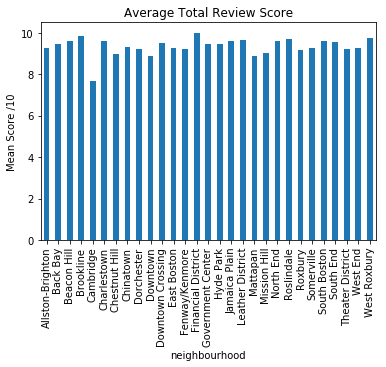

In [241]:
avg_score.plot(kind='bar', title='Average Total Review Score')
plt.ylabel('Mean Score /10');

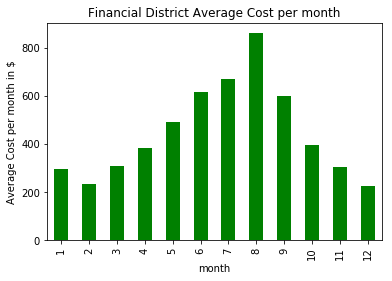

In [213]:
#Monthly Price fluctuations of the most popularly reviewed area (Financial District)
plt.ylabel('Average Cost per month in $')
x.plot(kind='bar', color='green', title='Financial District Average Cost per month');


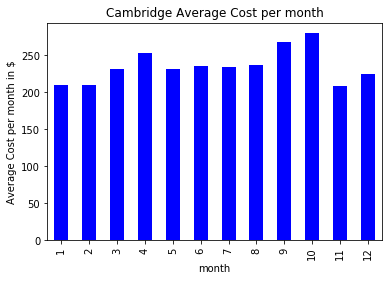

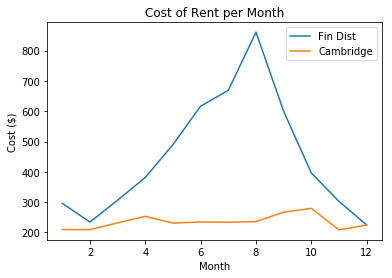

In [244]:
#Now lets find the Monthly average cost of the lowest review rated neighbourhood in Boston
plt.ylabel('Average Cost per month in $')
c.plot(kind='bar', color='b', title='Cambridge Average Cost per month');

#plotting on the same plot
fig, ax = plt.subplots()
plt.title('Cost of Rent per Month')
plt.ylabel('Cost ($)')
plt.xlabel('Month')
ax.plot(x, label='Fin Dist')
ax.plot(c, label='Cambridge')
plt.legend()

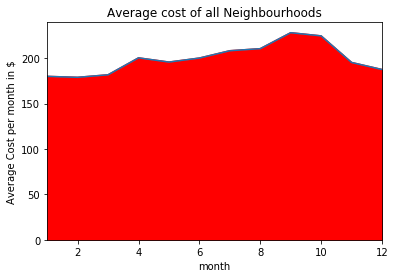

In [215]:
plt.ylabel('Average Cost per month in $')
avg_all.plot(kind='area', color='r', title='Average cost of all Neighbourhoods')
avg_all.plot(kind='line');


As we can see above, most neighbourhoods in Boston score an average overall rating of more than 9/10. This rating incorporates each users review of accuracy, cleanliness, checkin, communication, location and value for the airbnb rooms. We can see that the standout review score is the Financial District and the lowest overall score is in the Cambridge neighbourhood.

We then have a look at the average price of rent per month in both Cambridge and the Financial District. We can see that the lowest monthly cost of rent in the Financial District is equivalent to the average overall rent in Cambridge, whilst also seeing that the Financial District significantly spikes in the summer months.

I also looked at the overall mean for all neighbourhoods regarding price based on the month. We can see a similar trend in all the graphs where the cost seems to go up over the summer and then drop back down to significantly. 

#### Crime Evaluation; Based on Availability and Price

In [30]:
crime_sub.shape


(200072, 18)

In [31]:
#Create a Folium heatmap with a random location and assign a variable
m = folium.Map([42.26260773, -71.12118637], zoom_start=11)

In [32]:

crime_sub1 = crime_sub.copy()
crime_sub1['Lat']= crime_sub1['Lat'].astype(float)
crime_sub1['Long']= crime_sub1['Long'].astype(float)

crime_sub1 = crime_sub1[pd.notnull(crime_sub1['Lat'])]
crime_sub1 = crime_sub1[pd.notnull(crime_sub1['Long'])]
crime_sub1['Long'].isnull().sum()

crime_sample = crime_sub1.sample(1000,random_state=1)

In [33]:
for i, row in crime_sample.iterrows():
    folium.Circle([row['Lat'], row['Long']],
                        radius=10,
                        popup=folium.Popup(row['STREET']),
                        ).add_to(m)

In [34]:
crime_map = crime_sample[['Lat', 'Long']].as_matrix()
# plot heatmap
m.add_child(plugins.HeatMap(crime_map, radius=20))
m

C:\Users\m046250\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


![incase 'm' above doesn't show](heatmap.png)

In [35]:
#now let's look at the worst crime spots
crime_sub.groupby('Neighbourhood').size()
#we can see the highest 

Neighbourhood
Brighton         12763
Charlestown       4155
Dorchester       26989
Downtown         22304
East Boston       8255
Hyde Park        10840
Jamaica Plain    11077
Mattapan         22397
Roxbury          31230
South Boston     14357
South End        26291
West Roxbury      8329
dtype: int64

We can see above, that Roxbury, South End and Dorchester are standouts for having high crime in the neighbourhood. In comparison to an area such as Charlestown, which has very low crime rates for the years between 2016-2017. Our map also shows a random sample representation which really gives us an idea that Roxbury is located in central Boston, where it is likely a higher density, whilst Charelstown is up closer to the river and seperated from the main City area via a bridge.

I will now look into the rental pricing and availability of Airbnb accomodation between these areas. Unfortunately the Financial District did not appear in the crime statistics and will be left out. 

What we know is that the areas south of the Financial District seem to have higher rates of crime. Next I will look into what the availability and cost of living is in comparison to other areas, I am expecting to see results that show such high crime areas to have a lower cost of living and higher availability. 

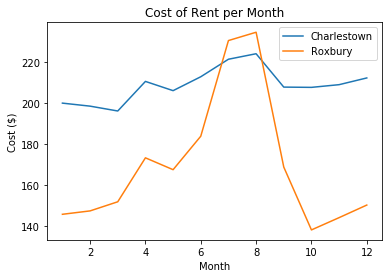

In [242]:

#roxbury
roxbury = score_cal[score_cal['neighbourhood'] == 'Roxbury']
rox_cal = roxbury.groupby('month').mean()
r = rox_cal.price
r

charlestown = score_cal[score_cal['neighbourhood'] == 'Charlestown']
ctown = charlestown.groupby('month').mean()
ch = ctown.price
ch
fig, ax = plt.subplots()
plt.title('Cost of Rent per Month')
plt.ylabel('Cost ($)')
plt.xlabel('Month')
ax.plot(ch, label='Charlestown')
ax.plot(r, label='Roxbury')
plt.legend()


In [37]:
avail = df_cal1.merge(scores, on='id')
print((avail[avail['neighbourhood'] == 'Roxbury']).available.value_counts())
print((avail[avail['neighbourhood'] == 'Charlestown']).available.value_counts())
avail.available.isna().sum() # 0 null values. cleaning has been completed properly

t    24700
f    17640
Name: available, dtype: int64
f    15535
t    13300
Name: available, dtype: int64


0

In [38]:
r = (24700/42340)*100
c = (15535/28835)*100
print("Over the year Roxbury had", r, "whilst Charlestown had",c,"% availability of AirBnb's")

Over the year Roxbury had 58.33726972130373 whilst Charlestown had 53.875498526096756 % availability of AirBnb's


What we can see here is that the lowest crime area, Charlestown, generally has a Airbnb rental pricepoint that floats well above the cost of the highest crime area of Roxbury. Charlestown also seems to have 5% less free accomodation over the period of a year.

#### Examining Mean Availability/Price & Incident Count

Below I will examine the total count of incidents per Neighbourhood in Boston and also cross examine that in contrast to the availability and price points of each area. This will give us some insight into whether higher crime does actually have an impact on whether people spend more to stay in a safer area. 

In [39]:
#create columns to show percentage availability based on total crimes.
 #total count of all rows relating to a crime
a = avail.groupby('neighbourhood').available.count()
b = (avail[avail['available'] == 't']).groupby('neighbourhood').available.count()

#creating a new dataframe for Neighbourhood, total number of incidents/crimes, 
#and the percentage available throughout the year
crime_count = crime_sub1.groupby('Neighbourhood').INCIDENT_NUMBER.count()#crime count
df_crime_avail = pd.DataFrame(crime_count)
df_crime_avail['availability'] = (b/a)*100 #availability of places

df_crime_avail['Average Price'] = score_cal.groupby('neighbourhood').price.mean()
df_crime_avail

,INCIDENT_NUMBER,availability,Average Price
Neighbourhood,,,
Brighton,12057,NaN,NaN
Charlestown,3919,46.124501,220.056090
Dorchester,25896,61.310854,97.524291
Downtown,19689,56.198630,151.604509
East Boston,7900,54.209109,147.689503
Hyde Park,10377,46.038356,73.465603
Jamaica Plain,10428,48.511474,158.740517
Mattapan,21234,69.547945,81.133937
Roxbury,28782,58.337270,163.847611


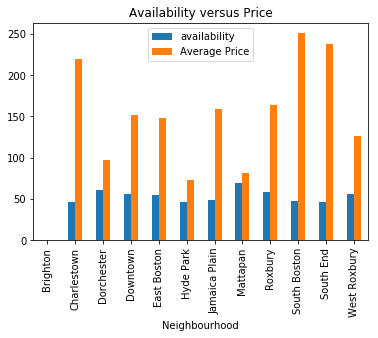

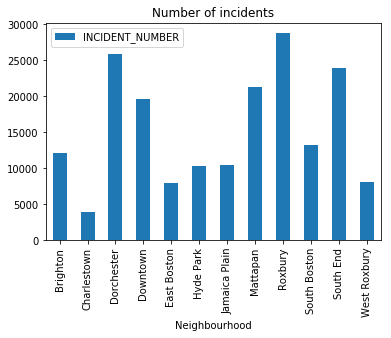

In [243]:
df_crime_avail.plot(kind='bar', y=['availability','Average Price'], title='Availability versus Price')
df_crime_avail.plot(kind='bar', y=['INCIDENT_NUMBER'], title='Number of incidents')

Looking at our graphs regarding average AirBnb price compared to availability, there does seem to be a general trend in higher costs meaning lower availbility. South Boston, South End and Charlestown are by far the most expensive areas averaging over $200 rental for the Airbnb accomodation a night. These areas also have the lowest accomodation availability, meaning that they are harder areas to rent in, despite the high cost.

On the flip side, we look at our lowest cost areas such as Hyde Park and Dorchester, which have an unusually large accomodation availability. Could this relate to higher crime?
Examining our findings of crime rates in these 2 areas, both seem to be stand out areas for high crime.

### 5. [Evaluation](#Evaluation)

#### Question 1: What are the most popular areas of Boston versus the least popular

The majority of the Neighbourhoods in Boston score a high review rate of 9/10 and above. Downtown, Cambridge and Mattapan are the only 3 Neighbourhoods that score below a 9. The Financial District scored a 10/10 for Airbnb reviews in contrast. 



#### Q2: How does pricing fluctuate over the seasonal periods ####
Pricing between the Neighbourhoods, Cambridge and the Financial District, show a significant difference. We can see that the Financial District has large pricing fluctuations in the summer compared to the other seasons, where as Cambridge has little to no fluctuation in pricing over the seasons. 

If we look at the mean average of all of Boston for AirBnb rentals, the price on a monthly basis seems to float around the $200 mark. We can see small variations in price per season, in that Summer is more expensive compared to Winter which is the cheapest of all seasons.

#### Q3:How do the more violent areas of Boston trend with rental ability ####
I utilized a Heatmap to show us where random smaples of crime seem to originate in the Boston area. Here we can see that crime tends to be higher in the Southern areas such as in South End, Roxbury and Dorchester.
Next, I examined the average yearly price point and the average yearly availability percentage. This was then cross examined with the total incident count per neighbourhood over the same time frame. Our findings show that in lower rental cost areas, availability of places tend to be higher, but crimes also are much higher. 


## References ##
    
1. Area Codes for Boston https://en.wikipedia.org/wiki/List_of_Massachusetts_area_codes
2. Police codes per area; https://bpdnews.com/districts
3. Kaggle Police Crimes https://www.kaggle.com/ankkur13/boston-crime-data/version/3
4. AirBnb Data; https://www.kaggle.com/airbnb/boston